<a href="https://colab.research.google.com/github/Kaustav9820/Kaustav9820/blob/main/Water_Potability_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving water_potability.csv to water_potability.csv
User uploaded file "water_potability.csv" with length 525187 bytes


In [2]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(io.BytesIO(uploaded ['water_potability.csv']))
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.isnull().sum

<bound method DataFrame.sum of          ph  Hardness  Solids  ...  Trihalomethanes  Turbidity  Potability
0      True     False   False  ...            False      False       False
1     False     False   False  ...            False      False       False
2     False     False   False  ...            False      False       False
3     False     False   False  ...            False      False       False
4     False     False   False  ...            False      False       False
...     ...       ...     ...  ...              ...        ...         ...
3271  False     False   False  ...            False      False       False
3272  False     False   False  ...             True      False       False
3273  False     False   False  ...            False      False       False
3274  False     False   False  ...            False      False       False
3275  False     False   False  ...            False      False       False

[3276 rows x 10 columns]>

In [5]:
df.shape

(3276, 10)

In [6]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [8]:
se=MinMaxScaler ()
df_n=pd.DataFrame(se.fit_transform(df),columns=df.columns)
df_n

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,NaN,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,NaN,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,NaN,0.368912,0.678284,NaN,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,NaN,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,NaN,0.387157,0.343638,0.622659,0.616120,1.0


In [9]:
for i in range(df_n.shape[1]):
  df_n.iloc[:,i]=df_n.iloc[:,i].fillna(df.iloc[:,i].median())
df_n

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,333.073546,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,333.073546,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,333.073546,0.368912,0.678284,66.622485,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,333.073546,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,333.073546,0.387157,0.343638,0.622659,0.616120,1.0


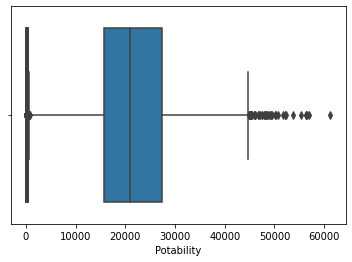

In [11]:
for i in range(df_n.shape[1]):
  sns.boxplot(x=df.iloc[:,i])

In [12]:
from scipy import stats
df_z=np.abs(stats.zscore(df_n))
df_z

array([[2.37920547, 0.25919471, 0.13947087, ..., 0.21641662, 1.28629758,
        0.79977474],
       [0.52244714, 2.03641367, 0.38598665, ..., 0.23377643, 0.68421789,
        0.79977474],
       [0.38828807, 0.84766483, 0.24004734, ..., 0.22806321, 1.16736546,
        0.79977474],
       ...,
       [0.34787283, 0.62682923, 1.27080989, ..., 0.22612391, 0.85600678,
        1.25035206],
       [0.47926804, 1.0413545 , 1.14405809, ..., 0.22179679, 0.95079738,
        1.25035206],
       [0.39515827, 0.03854623, 0.52581194, ..., 0.22111159, 2.12445866,
        1.25035206]])

In [13]:
 
 
df_N=df_n[(df_z<3).all(axis=1)]
df_N

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,333.073546,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,333.073546,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3270,0.433544,0.505009,0.423895,0.578908,0.615572,0.409897,0.378070,0.484188,0.419685,1.0
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3273,0.672822,0.465486,0.539101,0.547807,333.073546,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,333.073546,0.387157,0.343638,0.622659,0.616120,1.0


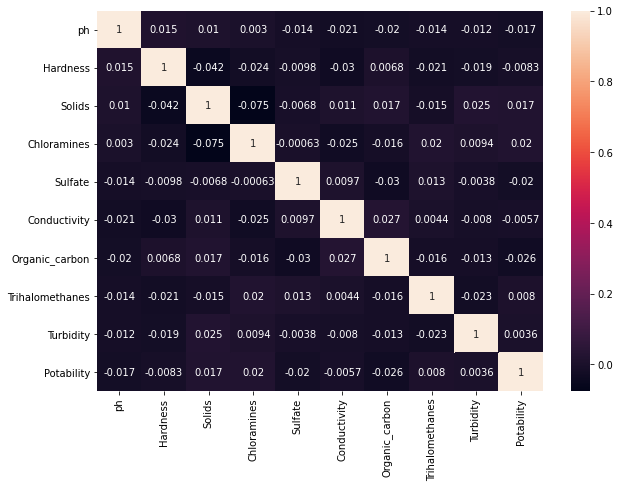

In [16]:
corr=df_N.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [17]:
import statsmodels.api as sm
W=sm.tools.add_constant(df_N)
W

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.0,7.036752,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,1.0,0.265434,0.297400,0.300611,0.491839,333.073546,0.719411,0.497319,0.450999,0.576793,0.0
2,1.0,0.578509,0.641311,0.321619,0.698543,333.073546,0.414652,0.562017,0.532866,0.303637,0.0
3,1.0,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,1.0,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3270,1.0,0.433544,0.505009,0.423895,0.578908,0.615572,0.409897,0.378070,0.484188,0.419685,1.0
3271,1.0,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3273,1.0,0.672822,0.465486,0.539101,0.547807,333.073546,0.438152,0.338662,0.560655,0.349570,1.0
3274,1.0,0.366197,0.664407,0.191490,0.465860,333.073546,0.387157,0.343638,0.622659,0.616120,1.0


In [18]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
Df=[variance_inflation_factor(W.values,i) for i in range(W.shape[1])]
Df

[107.55779547702349,
 1.002056030547871,
 1.0045854370015654,
 1.009315880234997,
 1.0081365517765448,
 1.0018953046373098,
 1.0030120395221056,
 1.0037265512506497,
 1.002203935364539,
 1.0020442576774429,
 1.0023147233672507]

In [19]:
df_N

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,333.073546,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,333.073546,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3270,0.433544,0.505009,0.423895,0.578908,0.615572,0.409897,0.378070,0.484188,0.419685,1.0
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3273,0.672822,0.465486,0.539101,0.547807,333.073546,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,333.073546,0.387157,0.343638,0.622659,0.616120,1.0


In [20]:
lg=LogisticRegression ()
Y=df_N['Potability']
X=df_N.drop('Potability',axis=1)
X_train,X_test,y_train,y_test=train_test_split(df_N,Y,test_size=0.2,random_state=0)

In [21]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
yp=lg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(yp,y_test)

1.0

In [23]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(X_train,y_train)
yp1=gn.predict(X_test)
accuracy_score(yp1,y_test)

1.0

In [24]:
gn.predict(df_N.iloc[3040:3041,:])

array([1.])